## Data augmentation

In [1]:
# Common imports
import numpy as np
import os, sys, glob  
from os.path import isfile, isdir
import librosa
import librosa.core as core
import scipy.io.wavfile as wavfile

# To plot pretty figures
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
%matplotlib inline


import warnings
warnings.filterwarnings("ignore")   # To rid of warnings 

os_sep = os.sep 

if sys.platform == 'win32':   # if windows 
    home = os.path.join('C:', os.sep, 'Users')      
elif sys.platform == "linux" or sys.platform == "linux2" :    
    home = os.path.expanduser("~")   # home = os.getenv("HOME")


In [2]:
wav_repo = os.path.join(home, '채진영', 'Desktop', 'counterUAV', 'after_data')
wav_data = glob.glob(os.path.join(wav_repo,'**','*.wav'), recursive=True)


**1 : person
2 : car
3 : drone**


In [3]:
sorted(wav_data) #11~14 18,19,24 drone

['C:\\Users\\채진영\\Desktop\\counterUAV\\after_data\\20181009_1_100023_person.wav',
 'C:\\Users\\채진영\\Desktop\\counterUAV\\after_data\\20181009_1_101055_person.wav',
 'C:\\Users\\채진영\\Desktop\\counterUAV\\after_data\\20181009_1_101420_person.wav',
 'C:\\Users\\채진영\\Desktop\\counterUAV\\after_data\\20181009_1_101635_person.wav',
 'C:\\Users\\채진영\\Desktop\\counterUAV\\after_data\\20181009_1_103752_car.wav',
 'C:\\Users\\채진영\\Desktop\\counterUAV\\after_data\\20181009_1_104216_car.wav',
 'C:\\Users\\채진영\\Desktop\\counterUAV\\after_data\\20181009_1_104446_car.wav',
 'C:\\Users\\채진영\\Desktop\\counterUAV\\after_data\\20181009_2_102248_person.wav',
 'C:\\Users\\채진영\\Desktop\\counterUAV\\after_data\\20181009_2_102508_person.wav',
 'C:\\Users\\채진영\\Desktop\\counterUAV\\after_data\\20181009_2_102849_person.wav',
 'C:\\Users\\채진영\\Desktop\\counterUAV\\after_data\\20181009_3_110458_person.wav',
 'C:\\Users\\채진영\\Desktop\\counterUAV\\after_data\\20181009_3_110901_drone.wav',
 'C:\\Users\\채진영\\Desktop\

In [4]:
wav_drone = []
for i in [10,11,12,13,17,18,23] :
    wav_drone.append(wav_data[i])

In [5]:
wav_drone

['C:\\Users\\채진영\\Desktop\\counterUAV\\after_data\\20181009_3_110458_person.wav',
 'C:\\Users\\채진영\\Desktop\\counterUAV\\after_data\\20181009_3_110901_drone.wav',
 'C:\\Users\\채진영\\Desktop\\counterUAV\\after_data\\20181009_3_111450_drone.wav',
 'C:\\Users\\채진영\\Desktop\\counterUAV\\after_data\\20181009_3_111734_drone.wav',
 'C:\\Users\\채진영\\Desktop\\counterUAV\\after_data\\20181016_3_142025_person.wav',
 'C:\\Users\\채진영\\Desktop\\counterUAV\\after_data\\20181016_3_142531_drone.wav',
 'C:\\Users\\채진영\\Desktop\\counterUAV\\after_data\\20181114_3_142450_person.wav']

calculate min and max of amplitude

In [13]:
amplitude_all = []
for i in range(len(wav_data)) :
    drone, sr = librosa.load(wav_data[i], sr=5862)
    amplitude_all.append(drone)

In [14]:
len(amplitude_all)

24

In [15]:
for i in range(len(wav_data)) :
    print(min(amplitude_all[i]), max(amplitude_all[i]))

0.011169434 0.015655518
0.01473999 0.015686035
0.013214111 0.015411377
0.0126953125 0.015563965
0.010803223 0.014587402
0.010528564 0.014190674
0.010986328 0.014953613
0.0 0.017852783
0.009796143 0.016204834
0.008392334 0.0152282715
0.013793945 0.014892578
0.008331299 0.014770508
0.011138916 0.014587402
0.0065307617 0.015411377
0.012451172 0.013824463
0.012023926 0.014129639
0.00036621094 0.030700684
0.01083374 0.013366699
0.010925293 0.013122559
0.00045776367 0.030761719
0.00039672852 0.030731201
0.00039672852 0.030731201
0.00045776367 0.030761719
0.00039672852 0.030731201


calculate only drone min, max of amplitude 

In [6]:
amplitude_drone = []

for i in range(len(wav_drone)) :
    drone, sr = librosa.load(wav_drone[i], sr=5862)
    amplitude_drone.append(drone)

In [8]:
len(amplitude_drone)

7

In [11]:
for i in range(len(wav_drone)) :
    print(min(amplitude_drone[i]), max(amplitude_drone[i]))

0.013793945 0.014892578
0.008331299 0.014770508
0.011138916 0.014587402
0.0065307617 0.015411377
0.01083374 0.013366699
0.010925293 0.013122559
0.00039672852 0.030731201


distribution of amplitude

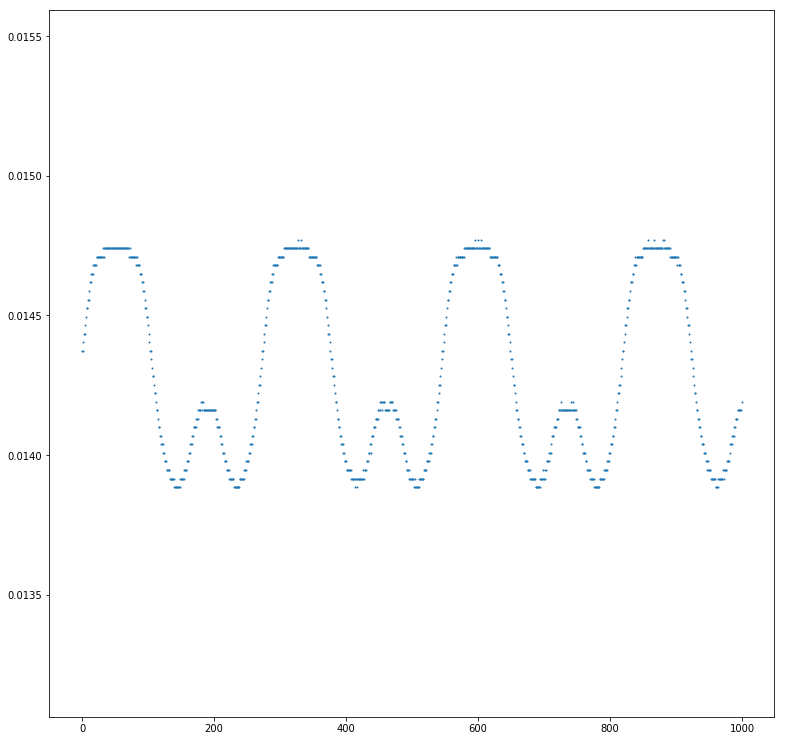

In [44]:
plt.figure(figsize=(13,13))
plt.scatter(np.arange(len(drone_1[:1000])),drone_1[:1000],s=1)

changing frequency

In [36]:
def manuipulate_pitch(data, sampling_rate, pitch_factor) :
    # data = librosa.feature.mfcc(data, sr=sampling_rate, n_mfcc=20)
    y_shift = librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)
    
    return y_shift 

time stretching
- FFT로 stretching 할건지 아니면 original wav로 stretching 할건지 정해야함

In [31]:
def manipulate_time(data, speed_factor) : # First, original wav
    # data = librosa.feature.mfcc(data, sr=5862, n_mfcc=20)
    y_stretch = librosa.effects.time_stretch(data, speed_factor)
    
    return y_stretch

noise adding

In [38]:
from pydub import AudioSegment

# setting random seed

np.random.seed(42)

def manipulate_noise(data, others, path) :
    rnd_index = np.random.randint(0, len(others), 1)
    noise = others[rnd_index]
    wav = AudioSegment.from_file(data, format='wav')
    output = wav.overlay(noise, loop=True)
    
    return output

plotting before and after shifting

In [26]:
from scipy.io.wavfile import read

def plotting(data) :
    (sr, x) = read(data)
    plt.figure(figsize=(13, 9))
    plt.plot(x)

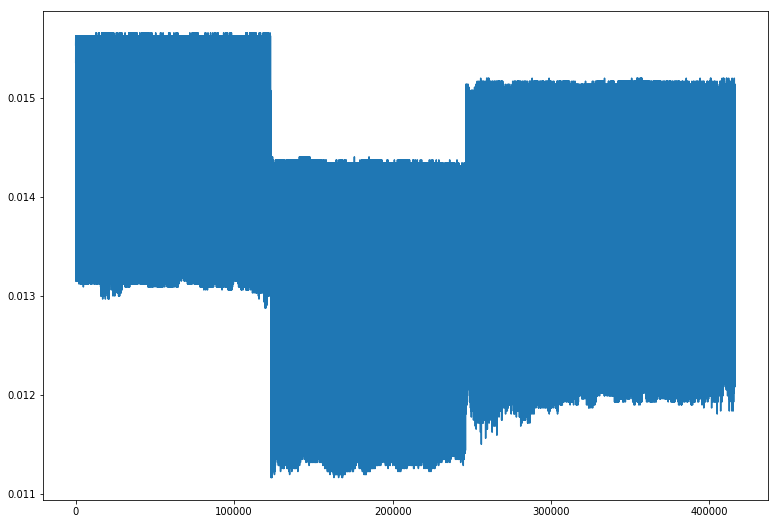

In [27]:
plotting(wav_data[0])

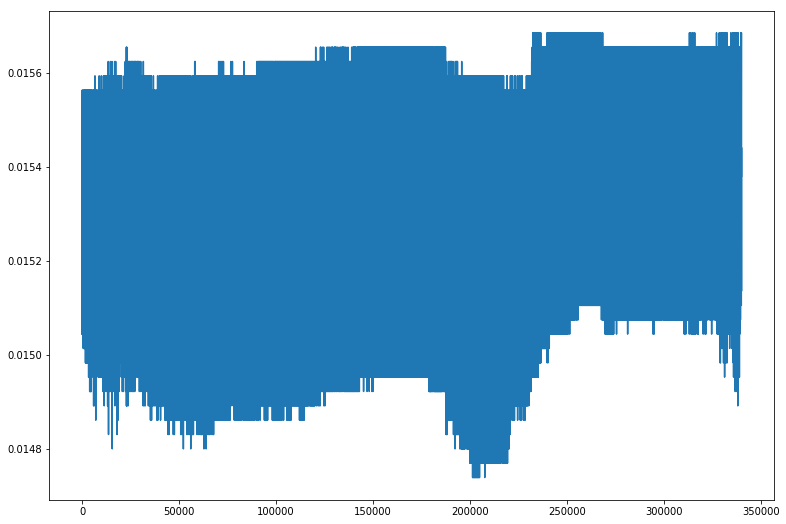

In [28]:
plotting(wav_data[1])